I. Set Up

In [1]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pathlib import Path
import glob
import ipywidgets as widgets
from IPython.display import clear_output
import random
import math
# ASTROPHY Imports
import astropy 
from astropy.table import Table
from astropy.io import fits
import astropy.stats as astats
import hepstats
from hepstats import *
# CIAO Imports
import ciao_contrib.runtool
from ciao_contrib.runtool import *
from ciao_contrib.runtool import search_csc, obsid_search_csc
from sherpa.astro import ui
import bxa.sherpa as bxa

# CUSTOM Imports
from data_exploration_functions import *
from data_extraction_functions import *
from data_representation_functions import *

def list_folders_fun(path):
    """
    DESCRIPTION: List folders in a given directory.
    INPUT: Directory path
    OUTPUT: Folder names in a given directory
    """
    folder_list = [f.name for f in Path(path).iterdir() if f.is_dir()]
    return folder_list

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets'
global_folders = list_folders_fun(global_path)

# Select dataset
set_widget = widgets.Dropdown(options=global_folders[:],value=global_folders[0],description='Set :',disabled=False); set_widget

Dropdown(description='Set :', options=('Full', 'All', 'Full_extra', 'New', 'Bona'), value='Full')

II. Load Data

In [2]:
# from matplotlib.colors import LogNorm
# from sherpa.astro import ui
# Set ID
set_id = set_widget.value

df_eventfiles_input = pd.read_csv(f'{global_path}/{set_id}/eventfiles-input-{set_id[0:4]}.csv')
df_properties_input = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id[0:4]}.csv')

df_properties_global = pd.read_csv(f'{global_path}/{set_id}/properties-{set_id[0:4]}.csv')
df_properties_global['obsreg_id'] = df_properties_global['obsid'].astype(str) + '_' + df_properties_global['region_id'].astype(str)

df_eventfiles_group = df_eventfiles_input.groupby('obsreg_id')
df_properties_group = df_properties_input.groupby('obsreg_id')

print("Number of Eventfiles: ", df_eventfiles_group.ngroups)
print("Number of Property Sets: ", df_properties_group.ngroups)

#print("ObsID and RegID: ", df_eventfiles_group.groups.keys())
df_properties_global.head()

Number of Eventfiles:  95473
Number of Property Sets:  95473


,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood_class,conf_flag,sat_src_flag,...,hard_hs_hilim,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_index_b,var_index_w,livetime,detector,obsreg_id
0,2CXO J000000.5-575830,0.002735,-57.975181,2.819565,1.667655,91.090421,8.522222,TRUE,True,False,...,-0.267958,0.085129,0.121377,0.376451,0.175421,0.0,NaN,30146.733203,ACIS-6,9335_26
1,2CXO J000001.7+003824,0.007280,0.640146,1.093394,0.871849,104.849964,5.485207,TRUE,False,False,...,0.269207,0.612624,0.585561,0.519756,0.678199,1.0,NaN,23719.527217,ACIS-7,11591_1
2,2CXO J000002.4+004444,0.010189,0.745732,0.746484,0.723548,34.468703,5.774224,TRUE,False,False,...,0.003123,0.425172,0.465109,0.489993,0.754087,0.0,NaN,23719.527217,ACIS-7,11591_22
3,2CXO J000002.4+321750,0.010280,32.297465,1.067836,0.944977,115.769199,5.028571,TRUE,False,False,...,0.222986,0.154076,0.177304,0.548595,NaN,0.0,NaN,24735.257397,ACIS-3,20515_8
4,2CXO J000002.9-350332,0.012314,-35.059185,0.855386,0.735828,172.590089,16.266113,TRUE,False,False,...,-0.377889,0.067012,0.113151,0.235485,0.080282,0.0,NaN,9937.243792,ACIS-6,15712_4


SOURCE FLUX

In [4]:
obsid = '23022'
regionid = '122'
id_name = obsid + '_' + regionid
download_path = f'/Users/steven/Desktop/CSCData/chandra/{obsid}/primary'
regevt_filename = [regevt for regevt in glob.iglob(f'{download_path}/*-eventfile*') if str(obsid) in regevt and str(regionid) in regevt][0]
hdul = fits.open(regevt_filename)
events = hdul[0].data
# events_table = Table(events)
# events_cols = events.columns.names
# print(events_cols)
# print(events['time'])



In [15]:
from astropy.coordinates import SkyCoord
import astropy.units as u

obsid = '23022'
regionid = '122'
id_name = obsid + '_' + regionid
download_path = f'/Users/steven/Desktop/CSCData/chandra/{obsid}/primary'
folder = '/Users/steven/Desktop/CSCData/analysis/'
event_filename = [evtf for evtf in glob.iglob(f'{download_path}/acisf*evt2*') if str(obsid) in evtf][0]
region_filename = [region for region in glob.iglob(f'{folder}/acisf*reg3.fits.gz') if str(obsid) in region and str(regionid) in region][0]
ciao_contrib.runtool.dmcopy(f'{event_filename}[sky=region({region_filename})][bin time=::3.24104][time=705955014:705956504]', f'{download_path}/{obsid}-{regionid}-eventfile4.fits.gz',clobber='yes')
regevt_filename = [regevt for regevt in glob.iglob(f'{download_path}/*-eventfile4*') if str(obsid) in regevt and str(regionid) in regevt][0]

# pha_filename = [spec for spec in glob.iglob(f'{folder}/acisf*pha3.fits.gz') if str(obsid) in spec and str(regionid) in spec][0]
# asol_filename = [aso for aso in glob.iglob(f'{folder}/pcadf*asol3.fits.gz') if str(obsid) in aso][0]
# mask_filename = [bpx for bpx in glob.iglob(f'{folder}/acisf*bpix3.fits.gz') if str(obsid) in bpx][0]
ra = df_properties_global[df_properties_global['obsreg_id'] == id_name].ra.values[0]
dec = df_properties_global[df_properties_global['obsreg_id'] == id_name].dec.values[0]
coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')
ra_str = coord.ra.to_string(unit=u.hourangle, sep=':', precision=4, pad=True)
dec_str = coord.dec.to_string(unit=u.deg, sep=':', precision=4, alwayssign=True, pad=True)
print(f"RA: {ra_str}, Dec: {dec_str}")

# 2CXO J051117.2-672556

srcflux(event_filename, pos=f'{ra_str},{dec_str}',outroot= f'/Users/steven/Desktop/CSCData/chandra/{obsid}-{regionid}-analysis', bands="broad",clobber='yes',conf=0.68,model='xspowerlaw.p1',paramvals='p1.PhoIndex=0.35',absmodel = 'xsphabs.abs1',absparams = 'abs1.nH=0.251') #, srcreg = region_filename, bkgreg = f'{folder}customregion.fits')

RA: 05:11:17.2839, Dec: -67:25:56.6273


srcflux
          infile = /Users/steven/Desktop/CSCData/chandra/23022/primary/acisf23022N003_evt2.fits.gz
             pos = 05:11:17.2839,-67:25:56.6273
         outroot = /Users/steven/Desktop/CSCData/chandra/23022-122-analysis
           bands = broad
          srcreg = 
          bkgreg = 
         bkgresp = yes
       psfmethod = ideal
         psffile = 
            conf = 0.68
         binsize = 1
         rmffile = 
         arffile = 
           model = xspowerlaw.p1
       paramvals = p1.PhoIndex=0.35
        absmodel = xsphabs.abs1
       absparams = abs1.nH=0.251
           abund = angr
      pluginfile = 
         fovfile = 
        asolfile = 
         mskfile = 
        bpixfile = 
         dtffile = 
         ecffile = CALDB
        parallel = yes
           nproc = INDEF
          tmpdir = /var/folders/q1/jbx7qj7s0dxbh7nv02nfvc680000gn/T/
     random_seed = -1
         clobber = yes
         verbose = 1
            mode = hl

Processing OBI 001
Extracting counts
Setti

Filename: /Users/steven/Desktop/CSCData/chandra/23022-122-analysis_broad.flux
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  HISTOGRAM     1 BinTableHDU    580   1R x 69C   [1D, 1D, 1D, 1D, 16A, 2D, 1D, 2D, 1I, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1L, 1J, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1J]   
  2  GTI           7 BinTableHDU     26   1R x 2C   [1D, 1D]   
  3  GTI           6 BinTableHDU     26   3R x 2C   [1D, 1D]   
  4  GTI           3 BinTableHDU     26   2R x 2C   [1D, 1D]   
  5  GTI           8 BinTableHDU     26   1R x 2C   [1D, 1D]   
[2.9013e-11]
[3.0646e-11]
Filename: /Users/steven/Desktop/CSCData/chandra/23022-122-analysis_0001_broad.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      

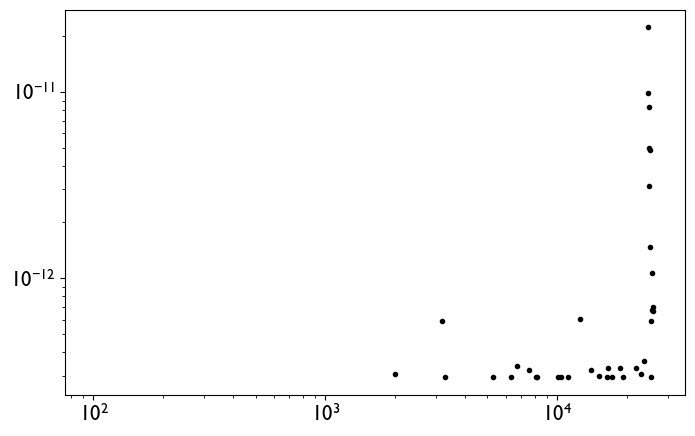

In [16]:
flux = '23022-122-analysis_broad.flux'
with fits.open(f'/Users/steven/Desktop/CSCData/chandra/{flux}') as file:
    file.info()
    data = file[1].data
    mflux_cnv = data['MFLUX_CNV']
    umflux_cnv = data['UMFLUX_CNV']

print(mflux_cnv)
print(umflux_cnv)

lc = '23022-122-analysis_0001_broad.lc'
with fits.open(f'/Users/steven/Desktop/CSCData/chandra/{lc}') as hdul_lc:
        prim = hdul_lc[0].data
        lc2 = hdul_lc[1].data
        time = lc2['TIME'] - min(lc2['TIME'])
        countrate = lc2['COUNT_RATE'] 
        flux = countrate * mflux_cnv
        # gti = hdul_lc[2].data
        # bg3 = hdul_lc[2].data
        # time = lc3['Time'] - min(lc3['Time'])
        # countrate = lc3['COUNT_RATE']
        # y_err = lc3['COUNT_RATE_ERR']
        hdul_lc.info()
        prim_df = pd.DataFrame(prim)
        lc2_df = pd.DataFrame(lc2)
        # print(prim_df)
        # print(lc2_df)
pd.set_option('display.max_columns', None)
lc2_df.head(251)

# Define Font Settings
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
# Create plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(time,flux,color='black',linestyle = '',marker = '.',label='Flux')
ax.set_yscale('log')
ax.set_xscale('log')


#  lc3 = hdul_lc[1].data
#             bg3 = hdul_lc[2].data
#             print('Time duration: ', min(lc3['Time']), max(lc3['Time']))
#             time = lc3['Time'] - min(lc3['Time'])
#             countrate = lc3['COUNT_RATE']
#             y_err = lc3['COUNT_RATE_ERR']
#             ax.plot(time/1000,countrate,color=c1,label='CSC Lightcurve')
#             # ax.plot(time,countrate, color='white',linewidth=3) #comment out
#             ax.errorbar(time/1000,countrate,y_err,fmt =fmt,color = c1,linewidth = 1,capsize = 2)
#             ax.set_xlabel('Time [ks]')
#             ax.set_ylabel('Count Rate [1/s]')

# 705931574.7065945 705956549.2084681

In [4]:
from astropy.coordinates import SkyCoord
import astropy.units as u

obsid = 12884
regionid = 10
id_name = str(obsid) + '_' + str(regionid)
folder = '/Users/steven/Desktop/CSCData/analysis/'
event_filename = [evtf for evtf in glob.iglob(f'{folder}/acisf*regevt3.fits.gz') if str(obsid) in evtf and str(regionid) in evtf][0]
region_filename = [region for region in glob.iglob(f'{folder}/acisf*reg3.fits.gz') if str(obsid) in region and str(regionid) in region][0]
pha_filename = [spec for spec in glob.iglob(f'{folder}/acisf*pha3.fits.gz') if str(obsid) in spec and str(regionid) in spec][0]
asol_filename = [aso for aso in glob.iglob(f'{folder}/pcadf*asol3.fits.gz') if str(obsid) in aso][0]
mask_filename = [bpx for bpx in glob.iglob(f'{folder}/acisf*bpix3.fits.gz') if str(obsid) in bpx][0]

# acisf12884_000N027_bpix3


ra = df_properties_global[df_properties_global['obsreg_id'] == id_name].ra.values[0]
dec = df_properties_global[df_properties_global['obsreg_id'] == id_name].dec.values[0]
coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')
ra_str = coord.ra.to_string(unit=u.hourangle, sep=':', precision=2, pad=True)
dec_str = coord.dec.to_string(unit=u.deg, sep=':', precision=2, alwayssign=True, pad=True)
print(f"RA: {ra_str}, Dec: {dec_str}")

# 2CXO J051117.2-672556

srcflux(event_filename, pos=f'{ra_str},{dec_str}',outroot= '/Users/steven/Desktop/CSCData/analysis/experiment4', bands="csc,broad", asolfile = asol_filename, bpixfile = mask_filename,clobber='yes') #,, srcreg = region_filename, bkgreg = f'{folder}customregion.fits')


RA: 14:08:28.93, Dec: -27:03:27.92


OSError: An error occurred while running 'srcflux':
  srcflux
            infile = /Users/steven/Desktop/CSCData/analysis/acisf12884_000N027_r0010_regevt3.fits.gz
               pos = 14:08:28.93,-27:03:27.92
           outroot = /Users/steven/Desktop/CSCData/analysis/experiment4
             bands = csc,broad
            srcreg = 
            bkgreg = 
           bkgresp = yes
         psfmethod = ideal
           psffile = 
              conf = 0.9
           binsize = 1
           rmffile = 
           arffile = 
             model = xspowerlaw.pow1
         paramvals = pow1.PhoIndex=2.0
          absmodel = xsphabs.abs1
         absparams = abs1.nH=%GAL%
             abund = angr
        pluginfile = 
           fovfile = 
          asolfile = /Users/steven/Desktop/CSCData/analysis/pcadf12884_000N027_asol3.fits.gz
           mskfile = 
          bpixfile = /Users/steven/Desktop/CSCData/analysis/acisf12884_000N027_bpix3.fits.gz
           dtffile = 
           ecffile = CALDB
          parallel = yes
             nproc = INDEF
            tmpdir = /var/folders/q1/jbx7qj7s0dxbh7nv02nfvc680000gn/T/
       random_seed = -1
           clobber = yes
           verbose = 1
              mode = hl
  
  # srcflux (01 December 2022): ERROR Cannot locate mask file.  Please specify 'mskfile' parameter.

In [5]:
import sys
import os
from collections import namedtuple
import numpy as np

 # search_csc(pos=f'{str(ra)}, {str(dec)}',radius='1',outfile=f'{name}-{id_name}.tsv',radunit='arcsec',root=f'{global_path}/{set_id}', download ='all',bands='broad', filetype='lc,pha,rmf,arf', catalog='cur',verbose=1, clobber=1)
    # lc_file  = glob.glob(f'{global_path}/{set_id}/acisf{obsid}*r{regid}_lc3.fits.gz')[0]
    # hdul = fits.open(lc_file)
    # hdul.info()

from sherpa.astro.ui import *

ReturnValue = namedtuple('ReturnValue', 'name value units description')

def srcflux_obsid_plugin(infile, outroot, band, elo, ehi, src_num):
    """    
    Sample plugin: fitting spectrum.
    
    This sample plugin uses sherpa to fit a spectral model, and 
    return an estimate of the flux w/ errors calculated with
    the sample_flux routine.    
    """

    pi_file = outroot+".pi"

    try:
        load_data(pi_file)
        group_counts(1)
        set_source(xsphabs.abs1*xspowerlaw.pl1)
        set_method("simplex")
        notice(0.5,8.0)
        fit()        
        fit_info = get_fit_results()            
        fflux, cflux, vals = sample_flux(lo=2.0, hi=10.0)
        f0, fhi, flo = cflux
                
        retval = [ReturnValue("fitted_Nh", abs1.nH.val, "cm**-22", "Fitted Absorption value"),
                  ReturnValue("photon_index", pl1.PhoIndex.val, "", "Fitted Photon Index"),
                  ReturnValue("normalization", pl1.norm.val, "", "Spectrum Normalization"),
                  ReturnValue("reduced_statistic", fit_info.rstat, "", "Reduced Fit Statistic"),
                  ReturnValue("fit_statistic", fit_info.statval, "", "Fit Statistic"),
                  ReturnValue("dof", fit_info.dof, "", "Degrees of Freedom"),
                  ReturnValue("sample_flux", f0, "", "2-10 keV Sample Flux"),
                  ReturnValue("sample_flux_lo", flo, "", "2-10 keV Sample Flux Uncertainty Low"),
                  ReturnValue("sample_flux_hi", fhi, "", "2-10 Sample Flux Uncertainty Low"),
                  ]
    except Exception as wrong:
        sys.stderr.write(str(wrong)+"\n")
        sys.stderr.write(f"Problem fitting {outroot} spectrum. Skipping it.")

        retval = [ReturnValue("fitted_Nh", np.nan, "cm**22", "Fitted Absorption value"),
                  ReturnValue("photon_index", np.nan, "", "Fitted Photon Index"),
                  ReturnValue("normalization", np.nan, "", "Spectrum Normalization"),
                  ReturnValue("reduced_statistic", np.nan, "", "Reduced Fit Statistic"),
                  ReturnValue("fit_statistic", np.nan, "", "Fit Statistic"),
                  ReturnValue("dof", np.nan, "", "Degrees of Freedom"),
                  ReturnValue("sample_flux", np.nan, "", "2-10 keV Sample Flux"),
                  ReturnValue("sample_flux_lo", np.nan, "", "2-10 Sample Flux Uncertainty Low"),
                  ReturnValue("sample_flux_hi", np.nan, "", "2-10 Sample Flux Uncertainty Low"),                  
                  ]

    return retval

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/spectrum_files/acisf23022_000N027_r0122_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/spectrum_files/acisf23022_000N027_r0122_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/spectrum_files/acisf23022_000N027_r0122_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
dataset 1: 0.511:7.9862 -> 0.4964:8.0008 Energy (keV)
Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 154820
Final fit statistic   = 9.24239 at function evaluation 37
Data points           = 16
Degrees of freedom    = 14
Probability [Q-value] = 0.815217
Reduced statistic     = 0.660171
Change in statistic   = 154811
   p1.PhoIndex    0.285739     +/- 0.2155     

(0.1, 10)

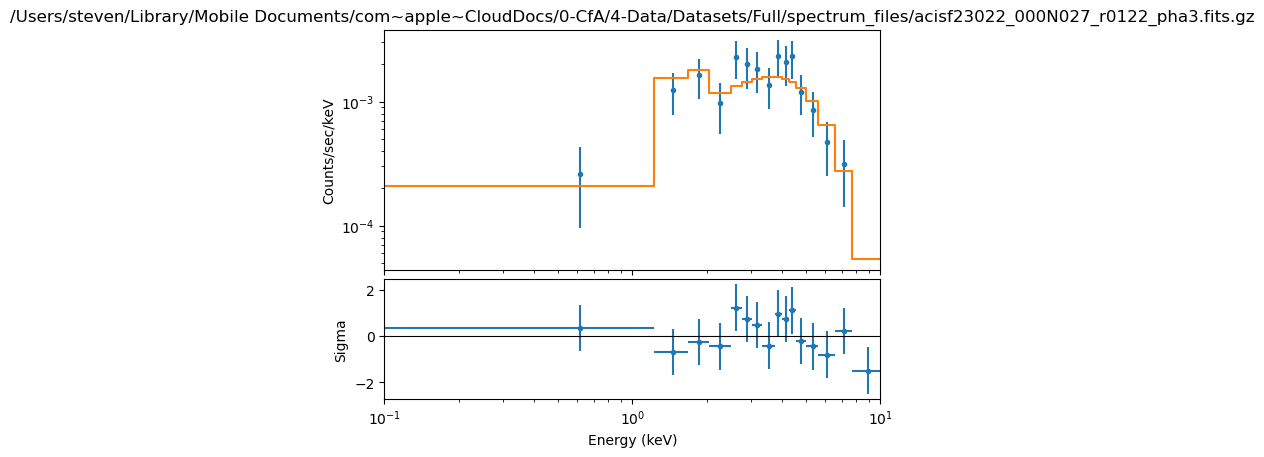

In [7]:
# Set the statistic and analysis method
obsid = '23022'
regionid = '122'
folder = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/spectrum_files/'
event_filename = [evtf for evtf in glob.iglob(f'{folder}/acisf*regevt3.fits.gz') if str(obsid) in evtf and str(regionid) in evtf][0]
region_filename = [region for region in glob.iglob(f'{folder}/acisf*reg3.fits.gz') if str(obsid) in region and str(regionid) in region][0]
pha_filename = [spec for spec in glob.iglob(f'{folder}/acisf*pha3.fits.gz') if str(obsid) in spec and str(regionid) in spec][0]
ui.load_pha(pha_filename)
ui.ignore('0.:0.5,8.0:')
ui.subtract()
ui.notice(0.5,8.0)
ui.group_counts(15)

ui.set_stat('chi2gehrels')
ui.set_analysis('ener')

# Set the source model
ui.set_source('xsphabs.abs1 * xspowerlaw.p1')

# Set initial parameter values
ui.set_par('p1.PhoIndex', 1.5)   # Photon index of the power law
ui.set_par('p1.norm', 1e-3)      # Normalization of the power law
ui.set_par('abs1.nH', 0.251)     # Absorption column density

# Freeze the absorption column density
ui.freeze('abs1.nH')

# Perform the fit
ui.fit()

# Access the best-fit parameter values
best_fit_values = [ui.get_par('p1.PhoIndex').val,ui.get_par('p1.norm').val, ui.get_par('abs1.nH').val]

# Print the best-fit parameter values
print(f"Photon Index: {best_fit_values[0]}")
print(f"Normalization: {best_fit_values[1]}")
print(f"Absorption column density: {best_fit_values[2]}")

# ui.plot_fit()
# ui.plot_fit_resid()

ui.set_ylog()
ui.set_xlog()
ui.plot_fit_delchi(xlog=True, ylog=True)
plt.xlim(1E-1,10)

# fit_curve = ui.get_fit_plot()
# data = fit_curve.dataplot.plot()
# model = fit_curve.modelplot.plot()
# print(model)

In [17]:

# Set the source model
ui.set_source('xsphabs.abs1 * xspowerlaw.p1')

# Set initial parameter values
ui.set_par('p1.PhoIndex', 1.5)   # Photon index of the power law
ui.set_par('p1.norm', 1e-3)      # Normalization of the power law
ui.set_par('abs1.nH', 0.251)     # Absorption column density

# Freeze the absorption column density
ui.freeze('abs1.nH')

# Perform the fit
ui.fit()

# Access the best-fit parameter values
best_fit_values = [ui.get_par('p1.PhoIndex').val,ui.get_par('p1.norm').val, ui.get_par('abs1.nH').val]

# Print the best-fit parameter values
print(f"Photon Index: {best_fit_values[0]}")
print(f"Normalization: {best_fit_values[1]}")
print(f"Absorption column density: {best_fit_values[2]}")

# ui.plot_fit()
# ui.plot_fit_resid()

ui.set_ylog()
ui.set_xlog()
ui.plot_fit_delchi(xlog=True, ylog=True)
plt.xlim(1E-1,10)

# fit_curve = ui.get_fit_plot()
# data = fit_curve.dataplot.plot()
# model = fit_curve.modelplot.plot()
# print(model)

read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/spectrum_files/acisf23022_000N027_r0122_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/spectrum_files/acisf23022_000N027_r0122_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/spectrum_files/acisf23022_000N027_r0122_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:6.9934 Energy (keV)
dataset 1: 0.511:6.9934 -> 0.4964:7.008 Energy (keV)
Model: 1
apply_rmf(apply_arf((24735.003845673 * (xsphabs.abs1 * (powlaw1d.p1 + xsdiskbb.p2)))))
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   abs1.nH      frozen        0.251            0        1e+06 10^22 atoms / cm^2
   p1.gamma     thawed            1          -10         

BlockingIOError: [Errno 35] Unable to open file (unable to lock file, errno = 35, error message = 'Resource temporarily unavailable')